# Results_CaseStudy

In [1]:
from main import main
import pandas as pd 
from sklearn.metrics import adjusted_rand_score , silhouette_score , normalized_mutual_info_score ,fowlkes_mallows_score

%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

def plot(file_path):
    data = pd.read_csv(file_path)
    
    plt.figure(figsize = (6,6))
    sns.scatterplot(data = data , 
                    x = "x" , 
                    y = "y" , 
                    hue = "group",
                    # hue_order = ['A' , 'B' , 'C'],
                    palette = 'muted')
    plt.title("Spatial Distributions of Groups")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.legend(title = "Group")
    plt.show()

In [3]:
def evaluate_metrics(coordinate_file_truth , coordinate_file_pred , apply_gene_similarity = False , apply_AD_weight = False):
    truth_data = pd.read_csv(coordinate_file_truth)
    pred_data = pd.read_csv(coordinate_file_pred)
    
    ARI = adjusted_rand_score(truth_data['group'] , pred_data['group'])
    NMI = normalized_mutual_info_score(truth_data['group'], pred_data['group'])
    Silhouette = silhouette_score(pred_data[['x', 'y']], pred_data['group'])
    FMI = fowlkes_mallows_score(truth_data['group'], pred_data['group'])
    SGD = main(coordinate_file_truth , coordinate_file_pred ,apply_gene_similarity = apply_gene_similarity , apply_AD_weight=apply_AD_weight , is_subtying = False)
    return {
        "ARI":ARI , 
        "NMI":NMI ,
        "Silhouette Coefficient":Silhouette,
        "FMI":FMI,
        "SGD": SGD
    }

## Case 1 : 边缘/中心

### 边缘

In [25]:
coordinate_file_truth = "data/simulate/Case1 (center_edge)/truth_SpatialData.csv"
coordinate_file_pred = "data/simulate/Case1 (center_edge)/edge_SpatialData.csv"

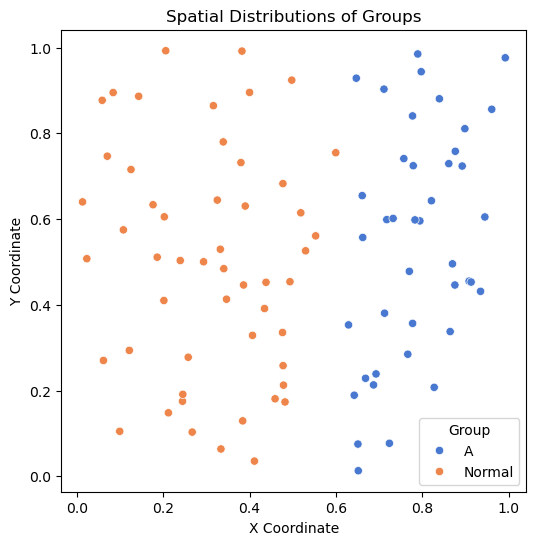

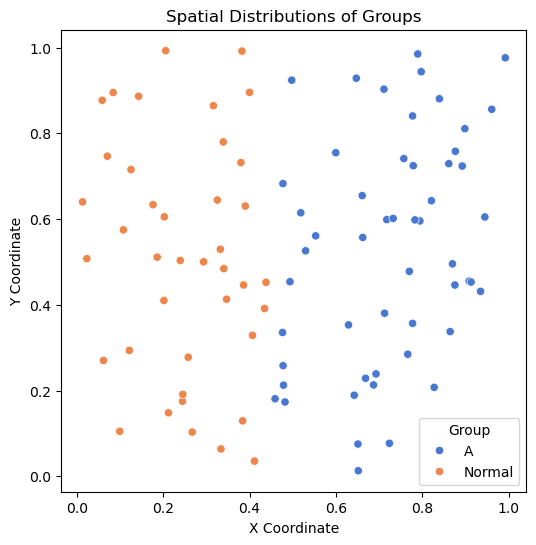

In [13]:
plot(coordinate_file_truth)
plot(coordinate_file_pred)

In [26]:
evaluate_metrics(coordinate_file_truth ,coordinate_file_pred , apply_gene_similarity = False , apply_AD_weight = False)

Graph Building took 0.01 seconds.
Getting edge attributes took 15.29 seconds.
Entire Loop took 6.89812 seconds.
Entire Loop took 6.73190 seconds.
Entire Loop took 10.66709 seconds.


{'ARI': 0.5455688378269921,
 'NMI': 0.5568468396464958,
 'Silhouette Coefficient': 0.34753340616847317,
 'FMI': 0.7741665777804776,
 'SGD': 0.9345856477588812}

### 中心

In [24]:
coordinate_file_truth = "data/simulate/Case1 (center_edge)/truth_SpatialData.csv"
coordinate_file_pred = "data/simulate/Case1 (center_edge)/center_SpatialData.csv"

evaluate_metrics(coordinate_file_truth ,coordinate_file_pred ,apply_gene_similarity = False , apply_AD_weight = False)

Graph Building took 0.02 seconds.
Getting edge attributes took 14.83 seconds.
Entire Loop took 6.87801 seconds.
Entire Loop took 6.90457 seconds.
Entire Loop took 10.65213 seconds.


{'ARI': 0.5455688378269921,
 'NMI': 0.5568468396464958,
 'Silhouette Coefficient': 0.17981067635626208,
 'FMI': 0.7741665777804776,
 'SGD': 1.7813091409162745}

## Case 2 : FN vs FP

### Case2.1:Binary

#### FP

In [37]:
coordinate_file_truth = "data/simulate/Case2 (FN_FP)/Case2.1/truth_SpatialData.csv"
coordinate_file_pred = "data/simulate/Case2 (FN_FP)/Case2.1/FP_SpatialData.csv"

In [16]:

evaluate_metrics(coordinate_file_truth ,coordinate_file_pred , apply_gene_similarity= False , apply_AD_weight=True)

Graph Building took 0.03 seconds.
Getting edge attributes took 32.08 seconds.
Entire Loop took 14.53909 seconds.
Entire Loop took 14.40916 seconds.
Entire Loop took 21.48021 seconds.


{'ARI': 0.3545232273838631,
 'NMI': 0.4207914918051407,
 'Silhouette Coefficient': 0.20517418735865817,
 'FMI': 0.7001099601629517,
 'SGD': 1.6328656700813944}

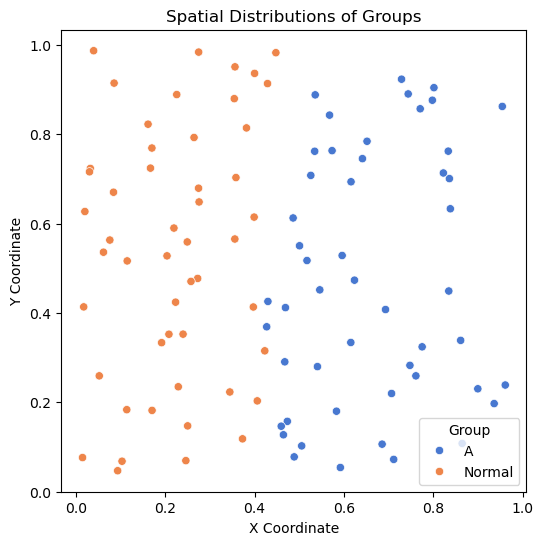

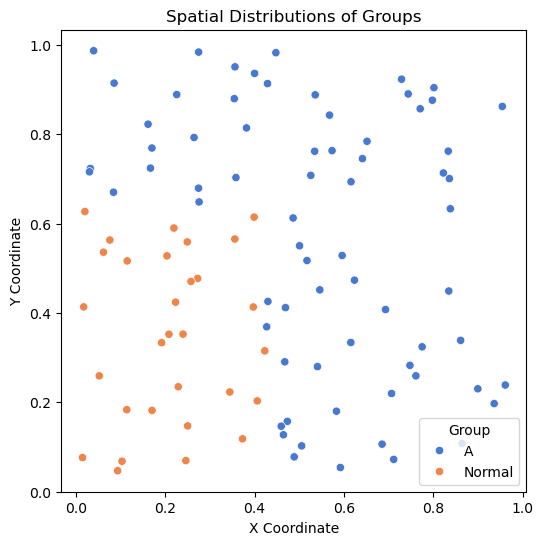

In [40]:
plot(coordinate_file_truth)
plot(coordinate_file_pred)

#### FN

In [41]:
coordinate_file_truth = "data/simulate/Case2 (FN_FP)/Case2.1/truth_SpatialData.csv"
coordinate_file_pred = "data/simulate/Case2 (FN_FP)/Case2.1/FN_SpatialData.csv"


In [17]:

evaluate_metrics(coordinate_file_truth ,coordinate_file_pred , apply_gene_similarity= False , apply_AD_weight=True)

Graph Building took 0.06 seconds.
Getting edge attributes took 59.16 seconds.
Entire Loop took 14.06835 seconds.
Entire Loop took 14.89573 seconds.
Entire Loop took 22.04033 seconds.


{'ARI': 0.3545232273838631,
 'NMI': 0.4207914918051407,
 'Silhouette Coefficient': 0.26403732715163003,
 'FMI': 0.7001099601629517,
 'SGD': 1.8912217571221173}

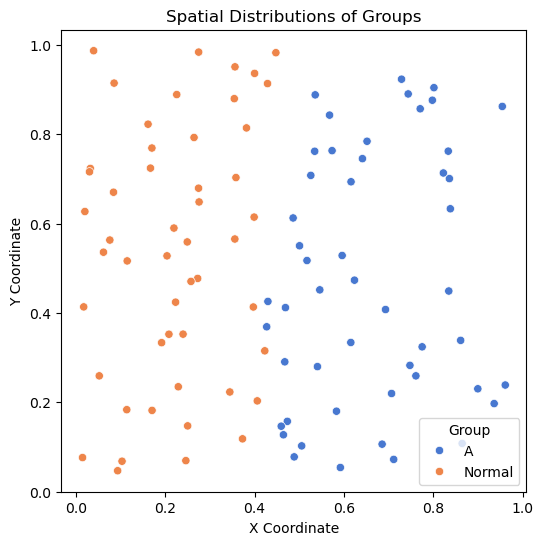

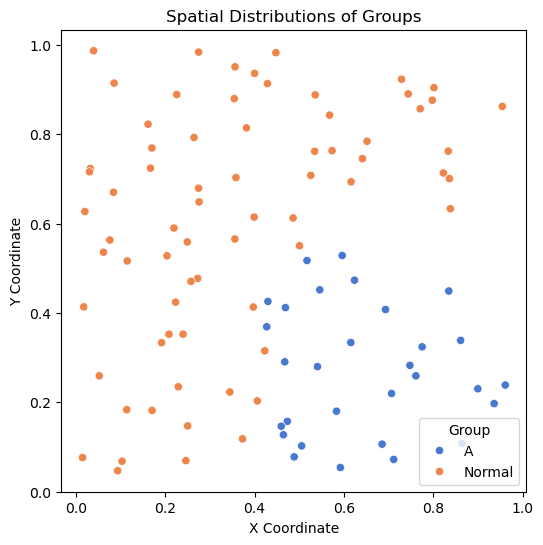

In [42]:
plot(coordinate_file_truth)
plot(coordinate_file_pred)

### Case2.2: 3 types 
Anomaly: B C 

Normal:A

type B is more serious than type C

#### B-A

In [10]:
coordinate_file_truth = "data/simulate/Case2 (FN_FP)/Case2.2/Truth_SpatialData.csv"
coordinate_file_pred = "data/simulate/Case2 (FN_FP)/Case2.2/BA_SpatialData.csv"

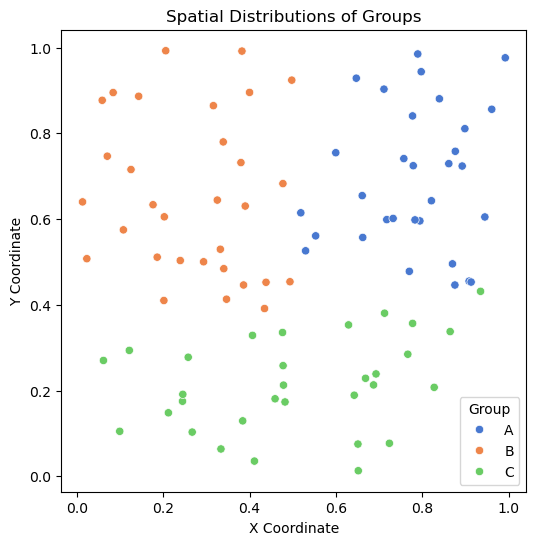

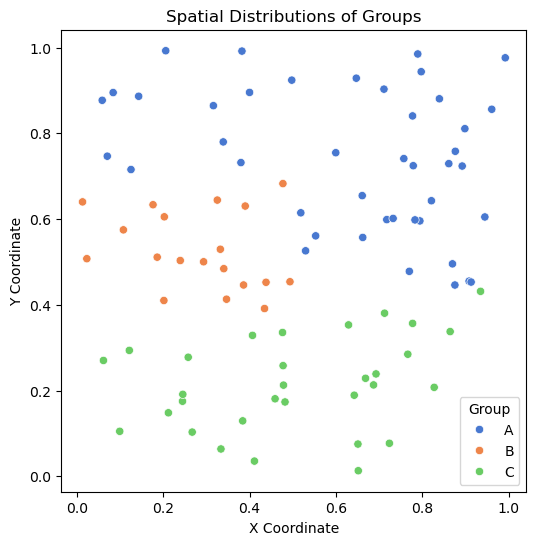

In [11]:
plot(coordinate_file_truth)
plot(coordinate_file_pred)

In [19]:
evaluate_metrics(coordinate_file_truth ,coordinate_file_pred , apply_gene_similarity= False , apply_AD_weight=True)

Graph Building took 0.01 seconds.
Getting edge attributes took 15.57 seconds.
Entire Loop took 8.58457 seconds.
Entire Loop took 6.97936 seconds.
Entire Loop took 8.48441 seconds.


{'ARI': 0.6891681870396649,
 'NMI': 0.7687589461923225,
 'Silhouette Coefficient': 0.251658084529804,
 'FMI': 0.79646086722093,
 'SGD': 1.143563877191395}

#### C-A

In [20]:
coordinate_file_truth = "data/simulate/Case2 (FN_FP)/Case2.2/Truth_SpatialData.csv"
coordinate_file_pred = "data/simulate/Case2 (FN_FP)/Case2.2/CA_SpatialData.csv"

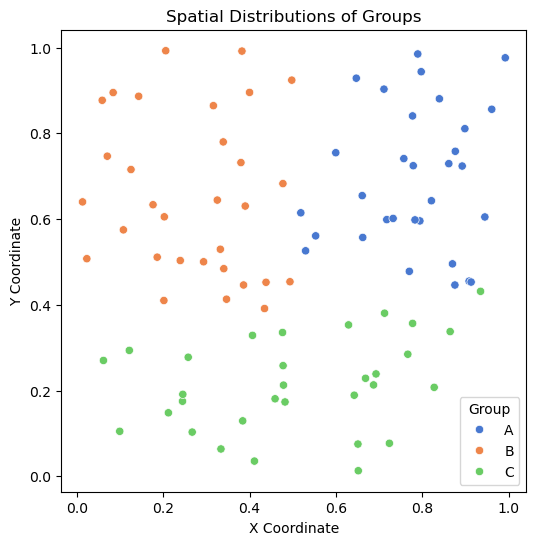

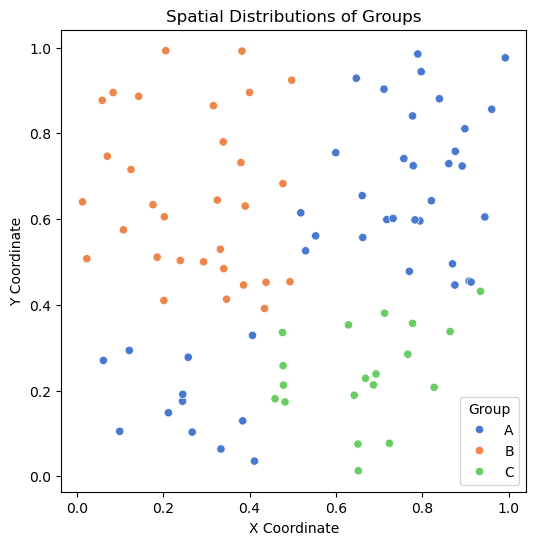

In [44]:
plot(coordinate_file_truth)
plot(coordinate_file_pred)

In [21]:
evaluate_metrics(coordinate_file_truth ,coordinate_file_pred , apply_gene_similarity= False , apply_AD_weight=True)

Graph Building took 0.02 seconds.
Getting edge attributes took 16.02 seconds.
Entire Loop took 6.90507 seconds.
Entire Loop took 7.07750 seconds.
Entire Loop took 8.07293 seconds.


{'ARI': 0.6891681870396649,
 'NMI': 0.7687589461923224,
 'Silhouette Coefficient': 0.2376376035724321,
 'FMI': 0.79646086722093,
 'SGD': 0.3427312572808028}

## Case 4 : Gene Similarity

### Case 4.1:不同类的分到同一类

#### 相似

In [21]:
coordinate_file_truth = "data/simulate/Case4 (GeneSimilarity)/4.1/test/sim_truth_SpatialData.csv"
coordinate_file_pred = "data/simulate/Case4 (GeneSimilarity)/4.1/test/sim_pred_SpatialData.csv"

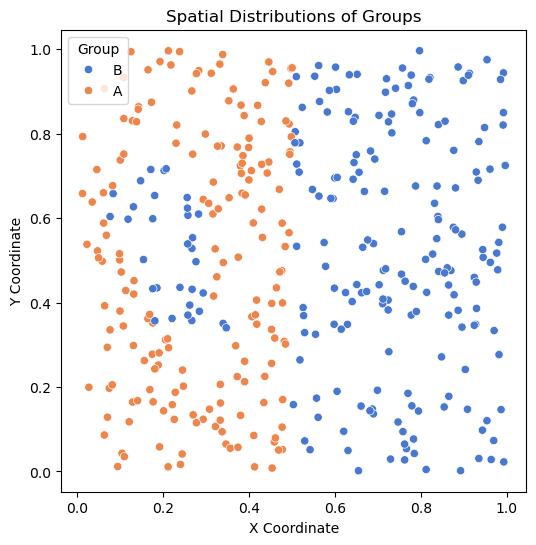

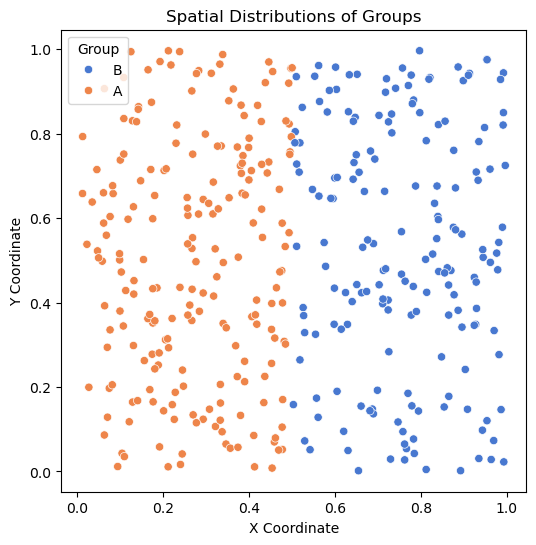

In [22]:
plot(coordinate_file_truth)
plot(coordinate_file_pred)

In [23]:
evaluate_metrics(coordinate_file_truth ,coordinate_file_pred , apply_gene_similarity= True , apply_AD_weight=False)

Graph Building took 0.03 seconds.
Getting edge attributes took 365.32 seconds.
Entire Loop took 73.23381 seconds.
Entire Loop took 70.78414 seconds.
Entire Loop took 153.43568 seconds.


{'ARI': 0.6958079250654646,
 'NMI': 0.6645138507722512,
 'Silhouette Coefficient': 0.3442246855857878,
 'FMI': 0.8485536034131528,
 'SGD': 0.12508886623839932}

#### 不相似

In [24]:
coordinate_file_truth = "data/simulate/Case4 (GeneSimilarity)/4.1/test/dissim_truth_SpatialData.csv"
coordinate_file_pred = "data/simulate/Case4 (GeneSimilarity)/4.1/test/dissim_pred_SpatialData.csv"

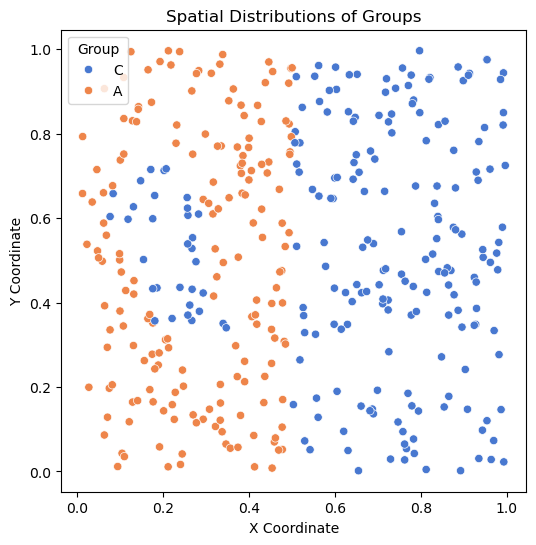

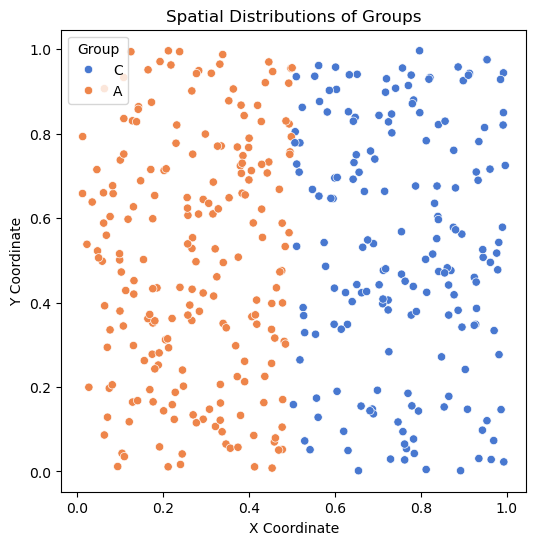

In [25]:
plot(coordinate_file_truth)
plot(coordinate_file_pred)

In [26]:
evaluate_metrics(coordinate_file_truth ,coordinate_file_pred , apply_gene_similarity= True , apply_AD_weight=False)

Graph Building took 0.09 seconds.
Getting edge attributes took 400.62 seconds.
Entire Loop took 73.55632 seconds.
Entire Loop took 72.59393 seconds.
Entire Loop took 177.75616 seconds.


{'ARI': 0.6958079250654646,
 'NMI': 0.6645138507722512,
 'Silhouette Coefficient': 0.3442246855708589,
 'FMI': 0.8485536034131528,
 'SGD': 0.9252653823005037}

### Case4.2:不同类分到同一类

#### 相似 A A 把A错分成B

In [4]:
coordinate_file_truth = "data/simulate/Case4 (GeneSimilarity)/4.2/truth_AA_SpatialData.csv"
coordinate_file_pred = "data/simulate/Case4 (GeneSimilarity)/4.2/AB_SpatialData.csv"

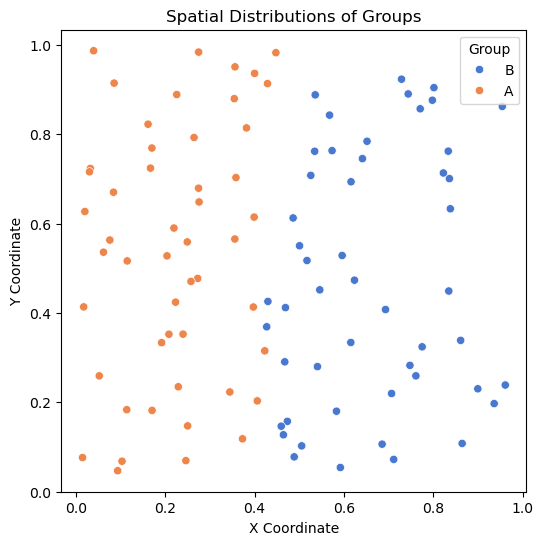

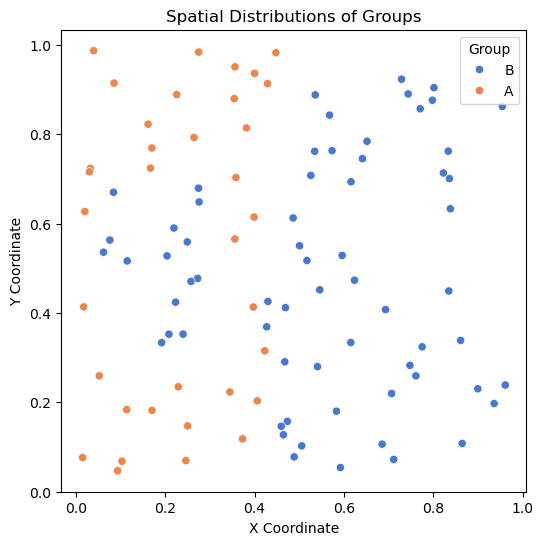

In [5]:
plot(coordinate_file_truth)
plot(coordinate_file_pred)

In [6]:
evaluate_metrics(coordinate_file_truth ,coordinate_file_pred , apply_gene_similarity= True , apply_AD_weight=False)

Graph Building took 0.01 seconds.
Getting edge attributes took 20.38 seconds.
Entire Loop took 7.03789 seconds.
Entire Loop took 6.89893 seconds.
Entire Loop took 9.63005 seconds.


{'ARI': 0.4852686308492201,
 'NMI': 0.5102432713148242,
 'Silhouette Coefficient': 0.1527671234137741,
 'FMI': 0.7519445197271296,
 'SGD': 1.4317973837146216}

#### 不相似

In [7]:
coordinate_file_truth = "data/simulate/Case4 (GeneSimilarity)/4.2/truth_AA_1_SpatialData.csv"
coordinate_file_pred = "data/simulate/Case4 (GeneSimilarity)/4.2/AB_SpatialData.csv"

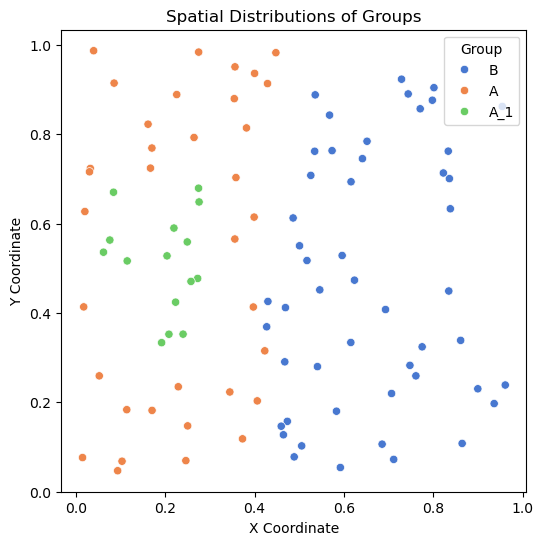

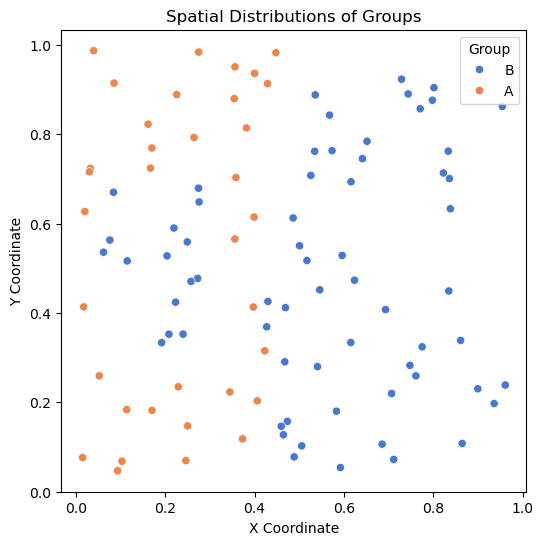

In [8]:
plot(coordinate_file_truth)
plot(coordinate_file_pred)

In [9]:
evaluate_metrics(coordinate_file_truth ,coordinate_file_pred , apply_gene_similarity= True , apply_AD_weight=False)

Graph Building took 0.01 seconds.
Getting edge attributes took 17.74 seconds.
Entire Loop took 6.97929 seconds.
Entire Loop took 7.05673 seconds.
Entire Loop took 27.62088 seconds.


{'ARI': 0.7023153252480706,
 'NMI': 0.7866785221984878,
 'Silhouette Coefficient': 0.1527671234137741,
 'FMI': 0.8483078263368192,
 'SGD': 0.6680719413216134}

## Case 5 :subtyping

In [ ]:
coordinate_file_truth = "data/simulate/Subtype_match/truth_SpatialData.csv"
coordinate_file_pred = "data/simulate/Subtype_match/pred_SpatialData.csv"

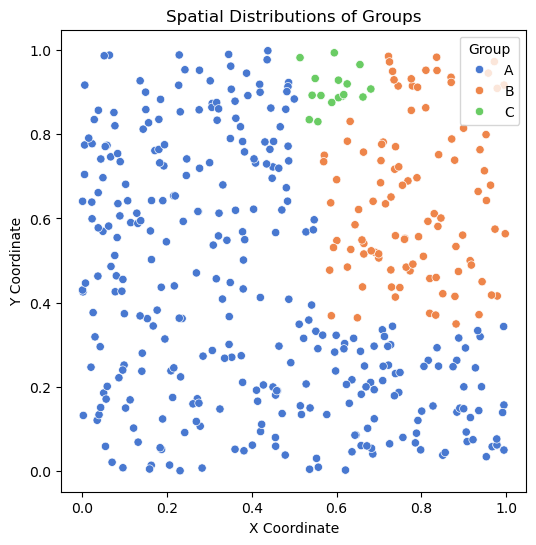

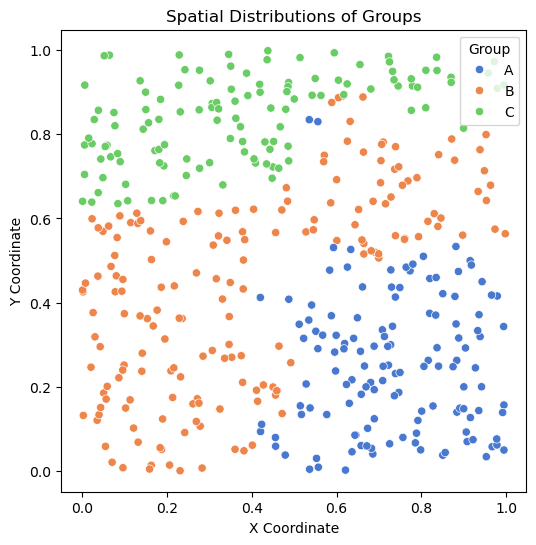

In [ ]:
plot(coordinate_file_truth)
plot(coordinate_file_pred)

In [ ]:
evaluate_metrics(coordinate_file_truth ,coordinate_file_pred , apply_gene_similarity= False , apply_AD_weight=False)

Graph Building took 0.03 seconds.
Getting edge attributes took 248.12 seconds.
Entire Loop took 61.09955 seconds.
Entire Loop took 65.89952 seconds.
Entire Loop took 186.49388 seconds.


{'ARI': -0.0003066639835535503,
 'NMI': 0.02173079034204027,
 'Silhouette Coefficient': 0.26465946173395705,
 'FMI': 0.4458738382598839,
 'SGD': 0.58557500527556}

In [ ]:
evaluate_metrics(coordinate_file_truth ,coordinate_file_pred , apply_gene_similarity= False , apply_AD_weight=False)

Graph Building took 0.02 seconds.
Entire Loop took 10.91297 seconds.
Entire Loop took 10.37908 seconds.
Entire Loop took 16.02559 seconds.
Entire Loop took 6.21693 seconds.
Entire Loop took 6.86603 seconds.
Entire Loop took 7.39989 seconds.
Entire Loop took 6.46841 seconds.
Entire Loop took 6.49950 seconds.
Entire Loop took 6.66560 seconds.


{'ARI': -0.0003066639835535503,
 'NMI': 0.02173079034204027,
 'Silhouette Coefficient': 0.26465946173395705,
 'FMI': 0.4458738382598839,
 'SGD_1': 0.15776909800501726,
 'SGD_2': 0.8395701131501034,
 'SGD_3': 2.0}

## Case 6:center split

### 集中

In [ ]:
coordinate_file_truth = "data/simulate/Case6 (center_split)/center_split(20240310)/truth_SpatialData.csv"
coordinate_file_pred = "data/simulate/Case6 (center_split)/center_split(20240310)/center_SpatialData.csv"

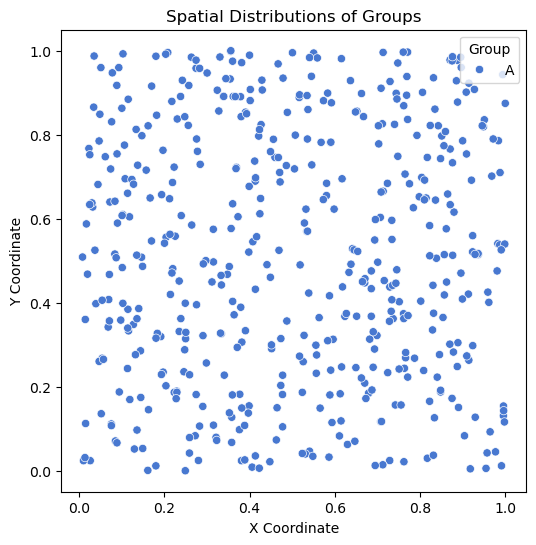

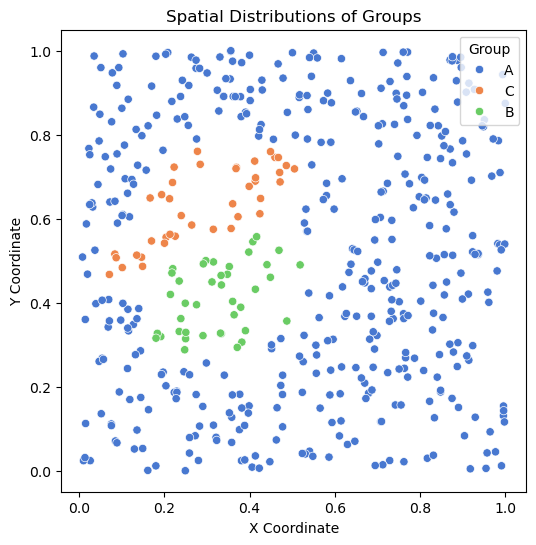

In [ ]:
plot(coordinate_file_truth)
plot(coordinate_file_pred)

In [ ]:
evaluate_metrics(coordinate_file_truth ,coordinate_file_pred , apply_gene_similarity= False , apply_AD_weight=False)

Graph Building took 0.04 seconds.
Getting edge attributes took 345.84 seconds.
Entire Loop took 123.96371 seconds.
Entire Loop took 112.18069 seconds.
Entire Loop took 215.55888 seconds.


{'ARI': 0.0,
 'NMI': 0.0,
 'Silhouette Coefficient': -0.14327338277035045,
 'FMI': 0.8472518346646912,
 'SGD': 1.9999999999999984}

### 分散

In [ ]:
coordinate_file_truth = "data/simulate/Case6 (center_split)/center_split(20240310)/truth_SpatialData.csv"
coordinate_file_pred = "data/simulate/Case6 (center_split)/center_split(20240310)/split_SpatialData.csv"

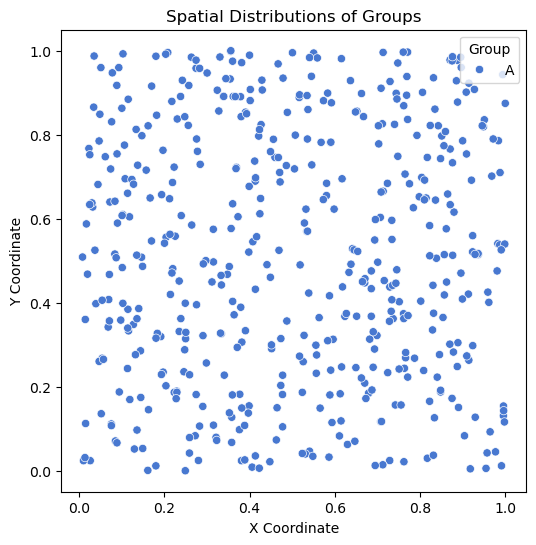

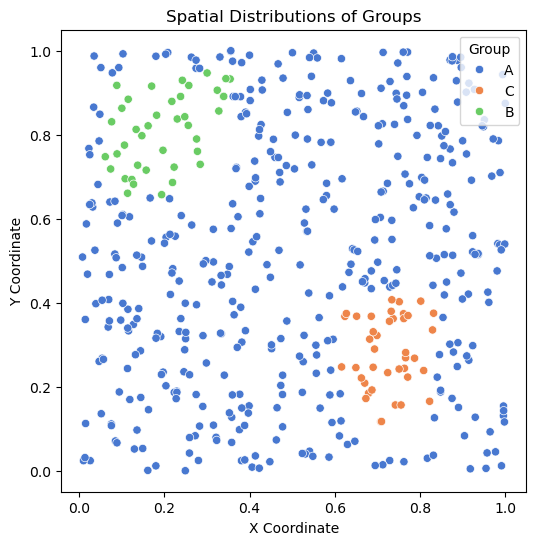

In [ ]:
plot(coordinate_file_truth)
plot(coordinate_file_pred)

In [ ]:
evaluate_metrics(coordinate_file_truth , coordinate_file_pred , apply_gene_similarity = False , apply_AD_weight=False)

Graph Building took 0.15 seconds.
Getting edge attributes took 249.32 seconds.
Entire Loop took 112.11418 seconds.
Entire Loop took 121.52008 seconds.
Entire Loop took 242.55933 seconds.


{'ARI': 0.0,
 'NMI': 0.0,
 'Silhouette Coefficient': -0.1336440744657711,
 'FMI': 0.8472518346646912,
 'SGD': 0.08709107257608895}